CS 621 Foundation of Data Analytics
Module 8

Author:  Matthew Heino

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

In [2]:
df = pd.read_csv('amazon_10_years.csv')

print(df.head())

print(df.size)

         Date    Open    High     Low   Close  Adj Close     Volume
0  2011-01-03  9.0685  9.3000  9.0605  9.2110     9.2110  106628000
1  2011-01-04  9.3075  9.3850  9.1890  9.2505     9.2505  100636000
2  2011-01-05  9.2050  9.3725  9.2035  9.3710     9.3710   68376000
3  2011-01-06  9.3250  9.3705  9.2625  9.2930     9.2930   63594000
4  2011-01-07  9.3940  9.4225  9.1870  9.2745     9.2745  104434000
17612


# Question 1

Which date has the largest volume number (date format as year-month-day)?

In [3]:
max_vol = df['Volume'].max()

date1 = df[df.Volume == max_vol]['Date']

print("\nQuestion 1:\nThe date has the largest volume number: ", date1)


Question 1:
The date has the largest volume number:  206    2011-10-26
Name: Date, dtype: object


# Question 2

Which date has the lowest open value number?

In [4]:
low_open = df['Open'].min()
low_date = df[df.Open == low_open]['Date']

print("\nQuestion 2: \nThe date has the lowest open value number: ", low_date)


Question 2: 
The date has the lowest open value number:  52    2011-03-18
Name: Date, dtype: object


# Question 3
Which date has the largest positive difference between open and close prices? (close price is higher than open price)  

In [5]:
q3_df = df[['Date','Open', 'Close']].copy()

q3_df['Variance'] = q3_df['Close'] - q3_df['Open']

print(q3_df.head())

max_dif = q3_df[q3_df.Variance == q3_df.Variance.max()]['Date']

print("\nQuestion 3:\nThe date with the largest positive difference between open and close prices: ",max_dif)

         Date    Open   Close  Variance
0  2011-01-03  9.0685  9.2110    0.1425
1  2011-01-04  9.3075  9.2505   -0.0570
2  2011-01-05  9.2050  9.3710    0.1660
3  2011-01-06  9.3250  9.2930   -0.0320
4  2011-01-07  9.3940  9.2745   -0.1195

Question 3:
The date with the largest positive difference between open and close prices:  2401    2020-07-20
Name: Date, dtype: object


# Question 4 

Which date has the largest negative difference between open and close prices? (close price is lower than open price) 

In [6]:
min_dif = q3_df[q3_df.Variance == q3_df.Variance.min()]['Date']

print("\nQuestion 4:\nThe date with largest negative difference between open and close prices: ",min_dif)


Question 4:
The date with largest negative difference between open and close prices:  2396    2020-07-13
Name: Date, dtype: object


# Question 5 

Which year has the largest total volume number?

In [7]:
q5_df = df[['Date','Volume']].copy()

q5_df['Year'] = pd.DatetimeIndex(q5_df['Date']).year

total_volume = q5_df.groupby(['Year'])['Volume'].sum()

tot_year = total_volume[total_volume == total_volume.max()]


print("Question 5:\nYear with the largest total volume is: ",str(tot_year.index))

Question 5:
Year with the largest total volume is:  Index([2011], dtype='int32', name='Year')


# Question 6 

Which weekday has the highest average volume number?

In [8]:
q6_df = q5_df.copy()

q6_df.drop('Year', axis=1, inplace=True)

q6_df['Weekday'] = pd.DatetimeIndex(q6_df['Date']).strftime('%A')

high_ave_day  = q6_df.groupby(['Weekday'])['Volume'].mean()

print("\nQuestion 6:\nThe weekday with highest average number is: \n\n",high_ave_day)


Question 6:
The weekday with highest average number is: 

 Weekday
Friday       9.596275e+07
Monday       8.275429e+07
Thursday     8.709561e+07
Tuesday      8.109033e+07
Wednesday    8.242126e+07
Name: Volume, dtype: float64


# Question 7

Create a time series line chart using Date and Close columns.

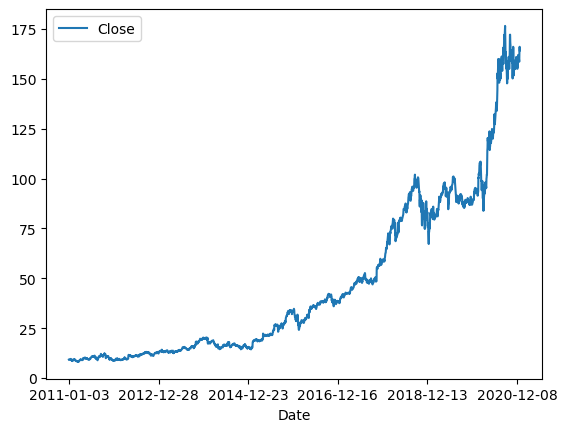

In [9]:
#Create a time series line chart using Date and Close columns.
time_series = pd.Series(df['Close'], index=df['Date'])

time_series_line = df.plot.line(x='Date', y='Close').get_figure()

time_series_line.savefig('time_series.pdf')

# Question 8

Create a time series line chart using Date and Close columns, Also add another line using rolling mean with window size 250.

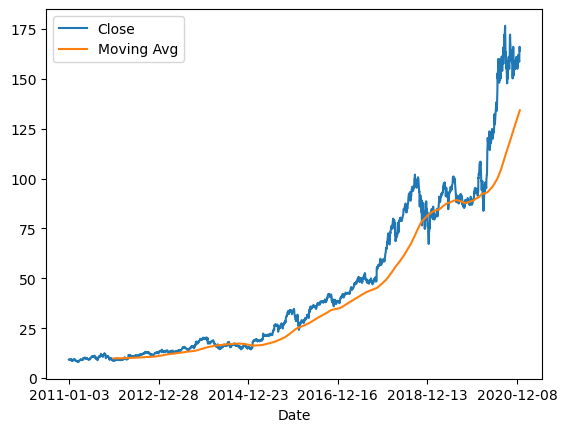

In [10]:
q7_df = df[['Date','Close']].copy()

# Creating a moving average with window size= 250.
q7_df['Moving Avg'] = q7_df['Close'].rolling(window=250).mean()

# Create the graph
mov_line = q7_df.plot.line(x='Date', y=['Close', 'Moving Avg']).get_figure()
mov_line.savefig('mov_lines.pdf')

# Question 9

Create a time series line chart using Date and Close column. Also add another line using rolling std with window size 250. 

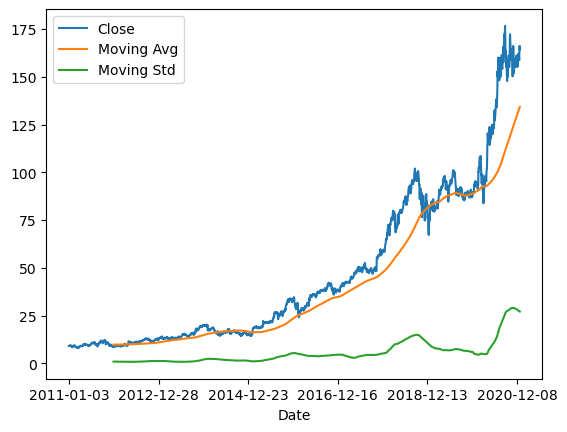

In [11]:
q7_df['Moving Std'] = q7_df['Close'].rolling(window=250).std()

mov_line2 = q7_df.plot.line(x='Date', y=['Close', 'Moving Avg','Moving Std']).get_figure()
mov_line2.savefig('mov_lines_std.pdf')